/Volumes/envs/mastering-python-2/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


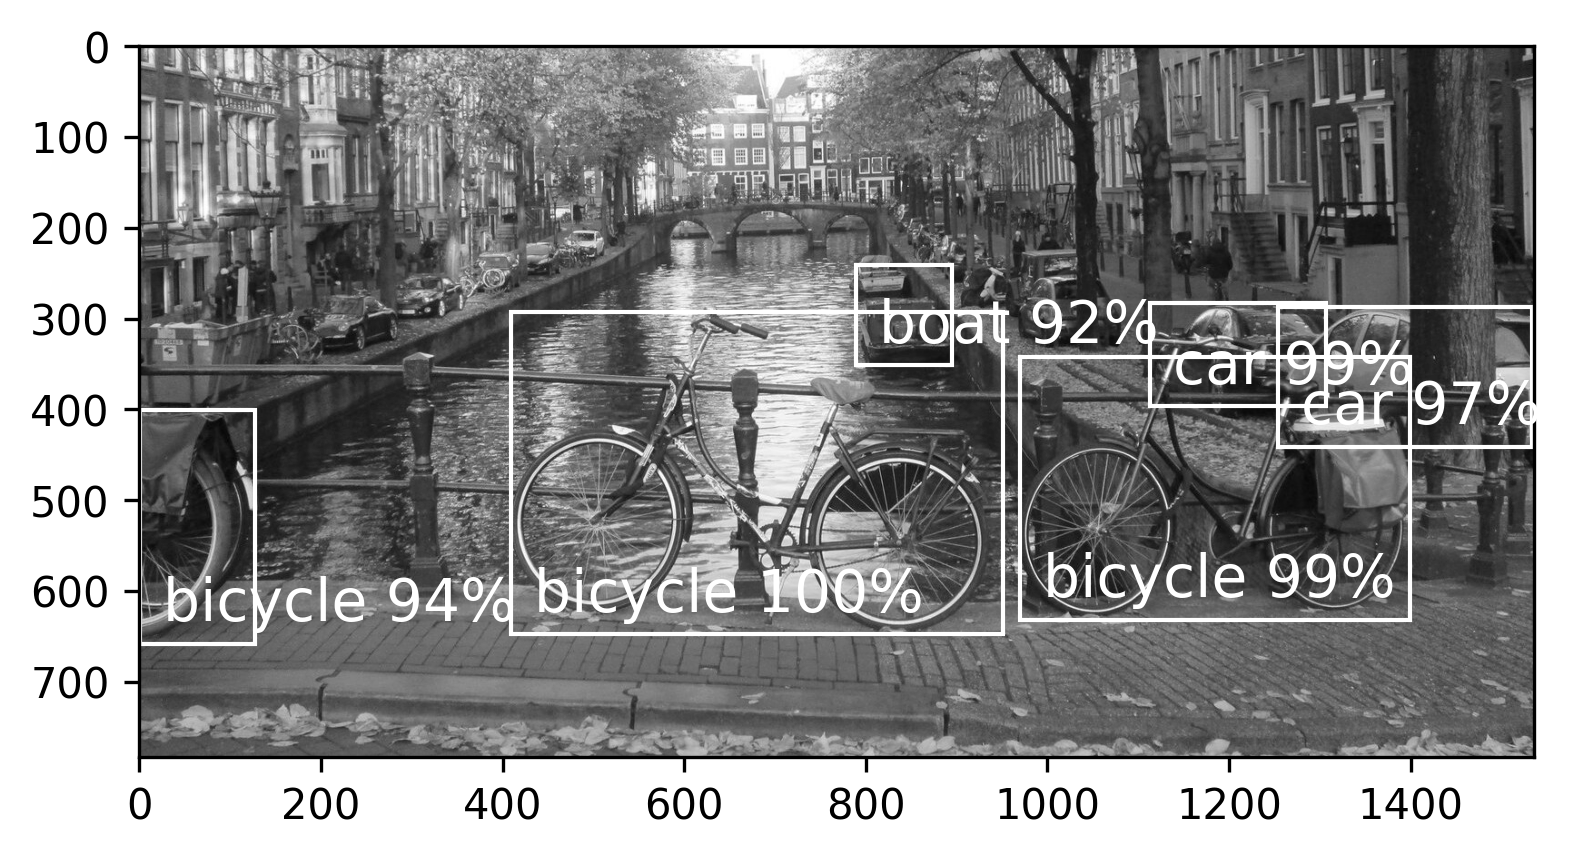

In [1]:
%matplotlib inline
from PIL import Image
from matplotlib import pyplot as plt, patches
from torchvision import transforms
from torchvision.models import detection

dpi = 300
font_size = 14
color = 'white'
min_score = 0.8
min_size = 100
label_offset = 25, -25

# Load the img and convert it to a PyTorch Tensor
img = Image.open('amsterdam-street.jpg')
img_t = transforms.ToTensor()(img)

# Read the labels from coco_labels. The entire COCO
# (Common Objects in COntext) dataset is available at:
# https://cocodataset.org/#download
labels = open('coco_labels.txt').read().splitlines()

# Load the R-CNN model and set it to eval mode for execution
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
# Apply the model to the img as a list and unpack after applying
out, = model([img_t])
results = zip(out['boxes'].detach(), out['labels'], out['scores'])

# Increase the DPI to get a larger output image
plt.figure(dpi=dpi)
img_desc = plt.subplot()
# Walk through the list of detections and print the results
for (t, l, b, r), label_idx, score in results:
    # Skip objects that are questionable matches
    if score < min_score:
        continue

    # Skip tiny matches
    h, w = b - t, r - l,
    if w < min_size or h < min_size:
        continue

    # Draw the bounding box and label
    img_desc.add_patch(patches.Rectangle(
        (t, l), h, w, fill=False, color=color))
    label = f'{labels[label_idx]} {score * 100:.0f}%'
    img_desc.text(
        t + label_offset[0], r + label_offset[1], label,
        fontsize=font_size, color=color)

# Output the img as grayscale for print purposes
plt.imshow(img.convert('L'), cmap='gray')
